## 사전설정

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기

In [3]:
df = pd.read_csv('E:\\2024 프로그래머스 데이터 분석 데브코스\\데이터 분석\\9주차\\2차프로젝트\\Programmer-Data-Analysis-2nd\\Seokjun\\data\\Preprocessed_BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,2,2,3,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,4,1,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,4,2,4,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,2,0,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,1,2,3,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,1,2,4,2,2,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,1,51,1,4,0,2,5,2,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,1,32,1,0,2,0,3,1,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,1,37,1,3,1,1,3,0,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,1,48,1,2,4,1,4,0,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### 스타일 설정

In [7]:
sns.set(style='whitegrid', palette='pastel', font_scale=0.8)

## 가설 검정

### 카드 사용 빈도와 이탈 여부

카드를 자주 사용하는 경우, 당사의 카드가 주로 사용되는 카드라고 해석할 수 있다. <br>
따라서 카드를 자주 사용한다면 이탈하지 않을 확률이 높다.

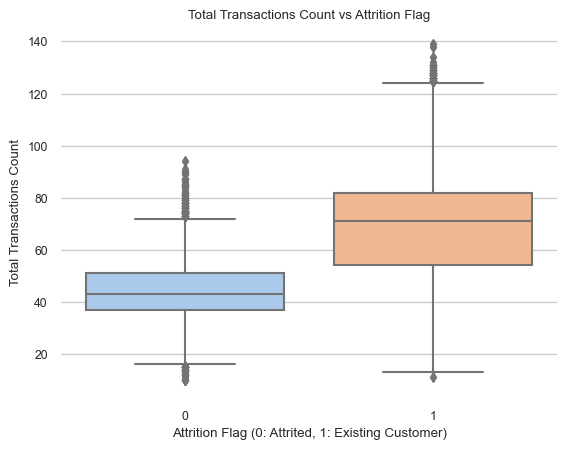

In [9]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Total Transactions Count vs Attrition Flag')
plt.xlabel('Attrition Flag (0: Attrited, 1: Existing Customer)')
plt.ylabel('Total Transactions Count')
sns.despine(left=True, bottom=True)
plt.show()

> 이탈한 사용자에 비해 이탈하지 않은 사용자가 확연하게 높게 나타나는 것을 알 수 있음.

### 신용 한도와 이탈 여부

미국의 경우 신용 등급의 기준에 '카드와 계좌의 수'도 포함이 된다고 한다. <br>
따라서 신용 한도가 낮다면, 신용등급을 올리기 위해 이탈할 가능성이 있을 것이다.

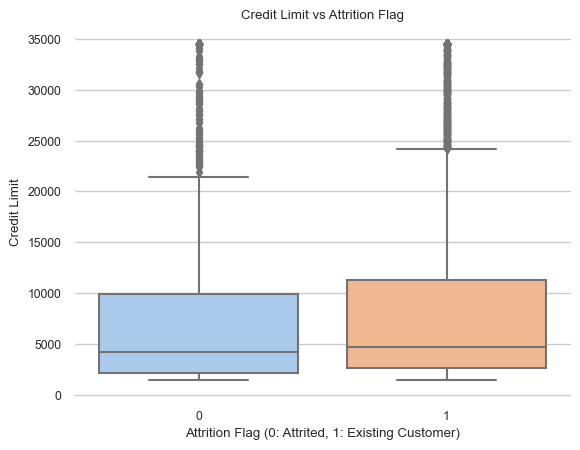

In [10]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Credit Limit vs Attrition Flag')
plt.xlabel('Attrition Flag (0: Attrited, 1: Existing Customer)')
plt.ylabel('Credit Limit')
sns.despine(left=True, bottom=True)
plt.show()

> 차이가 분명하진 않지만 이탈하지 않은 고객의 신용 한도가 더욱 높은 것을 알 수 있음.

### 카드의 신규 가입 여부와 이탈 여부

미국의 경우 ‘5/24(24개월 이내 5개 신용카드 이상 신청불가)’라는 조항이 있어 카드 신청과 해지에 조심스러울 것이다. <br>
따라서 카드를 신규가입한 경우 이탈하지 않을 것이라는 가설을 세울 수 있다.

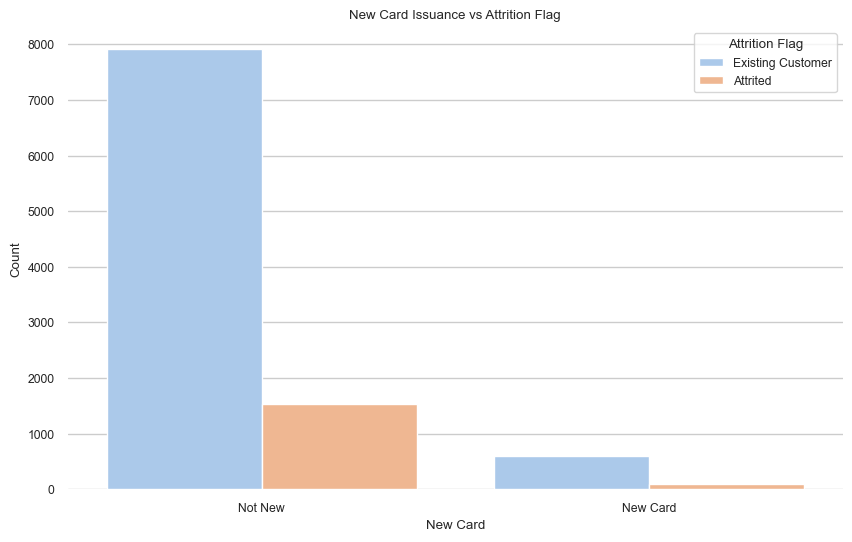

In [20]:
# 신규 카드를 발급받은 여부를 나타내는 열 추가 (신규 발급을 Months_on_book < 24로 가정)
df['New_Card'] = df['Months_on_book'].apply(lambda x: "New Card" if x < 24 else "Not New")
df['Attrition_Flag_Str'] = df['Attrition_Flag'].apply(lambda x: "Attrited" if x == 0 else "Existing Customer")

plt.figure(figsize=(10, 6))
sns.countplot(x='New_Card', hue='Attrition_Flag_Str', data=df)
plt.title('New Card Issuance vs Attrition Flag')
plt.xlabel('New Card')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
sns.despine(left=True, bottom=True)
plt.show()


> 뚜렷한 차이가 보이지 않음. 더욱 자세히 보기 위해 비율 기반의 시각화가 필요해보임.

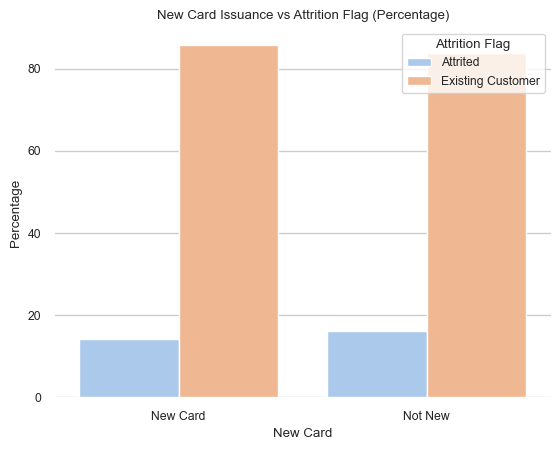

In [22]:
df['New_Card'] = df['Months_on_book'].apply(lambda x: "New Card" if x < 24 else "Not New")
df['Attrition_Flag_Str'] = df['Attrition_Flag'].apply(lambda x: "Attrited" if x == 0 else "Existing Customer")

new_card_counts = df.groupby(['New_Card', 'Attrition_Flag_Str']).size().reset_index(name='counts')
new_card_counts['percentage'] = new_card_counts['counts'] / new_card_counts.groupby('New_Card')['counts'].transform('sum') * 100

sns.barplot(x='New_Card', y='percentage', hue='Attrition_Flag_Str', data=new_card_counts)
plt.title('New Card Issuance vs Attrition Flag (Percentage)')
plt.xlabel('New Card')
plt.ylabel('Percentage')
plt.legend(title='Attrition Flag')
sns.despine(left=True, bottom=True)
plt.show()

> 신규 가입 고객의 이탈률이 조금 더 낮게 관측됨.

c:\Users\seokj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\seokj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\seokj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that arti

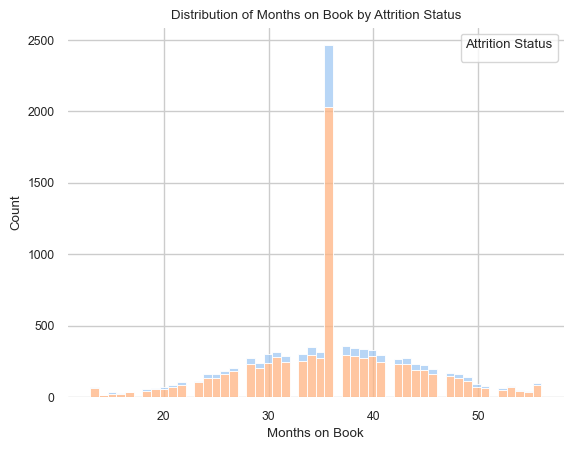

In [26]:
df['Attrition_Status'] = df['Attrition_Flag'].apply(lambda x: "Attrited Customer" if x == 0 else "Existing Customer")
df['Attrition_Status'] = df['Attrition_Status'].astype('category')

sns.histplot(data=df, x='Months_on_book', hue='Attrition_Status')
plt.title('Distribution of Months on Book by Attrition Status')
plt.xlabel('Months on Book')
plt.ylabel('Count')
plt.legend(title='Attrition Status')
sns.despine(left=True, bottom=True)
plt.show()